# Checks for model

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv(f"D:/Docs/train_1.csv", encoding='mac_roman')
#tickets = pd.read_csv(f"D:/SYED/Docs/train.csv", encoding='mac_roman')

In [24]:
df['ticket_date'] = pd.to_datetime(df['ticket_date'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

## 1. Encoding of disposition column

In [25]:
df['disposition'].replace(['Not Responsible', 'Responsible', 'PENDING'], [0, 1, 2], inplace=True)
df['disposition'].value_counts()

1    159880
0     89725
2       691
Name: disposition, dtype: int64

<AxesSubplot:>

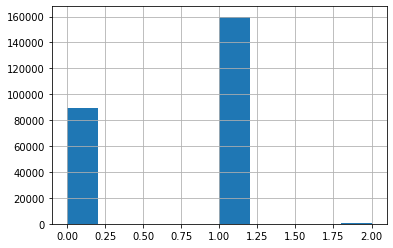

In [26]:
#Simple histogram
df['disposition'].hist()

In [27]:
#Make paid in full also as compliant
df.loc[df['payment_status'] == 'PAID IN FULL', 'compliance'] = 1
df['payment_status'].value_counts()

NO PAYMENT APPLIED         209183
PAID IN FULL                31931
PARTIAL PAYMENT APPLIED      9182
Name: payment_status, dtype: int64

## 2. Encode payment status

In [28]:
# Need to encode the text values as numbers as well
df['payment_status'].replace(['NO PAYMENT APPLIED', 'PAID IN FULL', 'PARTIAL PAYMENT APPLIED'], [0, 1, 2], inplace=True)
df['payment_status'].value_counts()


0    209183
1     31931
2      9182
Name: payment_status, dtype: int64

In [29]:
df.head(3)

,ticket_id,city,ticket_date,disposition,fine_amount,late_fee,judgment_amount,balance_due,payment_status,compliance
0,22056,CHICAGO,NaT,1,250.0,25.0,305.0,305.0,0,0.0
1,27586,Detroit,NaT,1,750.0,75.0,855.0,75.0,1,1.0
2,22062,Detroit,NaT,0,250.0,0.0,0.0,0.0,0,NaN


## 3. Fill missing compliance with 0.5 (yes/no)

In [30]:
df['compliance'] = df['compliance'].fillna(0.5)
df['city'].value_counts()

Detroit             154490
Southfield           14760
DEARBORN              4667
FARMINGTON HILLS      2329
OAK PARK              2216
                     ...  
abhl                     1
BLOOM FIELD TWP          1
PLMOUTH                  1
SOUTHFIERD               1
SFLD,                    1
Name: city, Length: 5144, dtype: int64

## 4. Encode city values > 300

In [31]:
df = df.groupby('city').filter(lambda x : len(x) > 300)
#df['city'].value_counts()
#counts = df.city.value_counts()
#counts.to_csv('city100plus.csv')

In [42]:
df['fine_amount'] = df['fine_amount'].fillna(0)
df.shape

(212326, 11)

In [34]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["city_code"] = ord_enc.fit_transform(df[["city"]])
df[["city", "city_code"]].head(11)

,city,city_code
0,CHICAGO,5.0
1,Detroit,8.0
2,Detroit,8.0
3,Detroit,8.0
4,Detroit,8.0
7,Detroit,8.0
8,Detroit,8.0
9,Detroit,8.0
10,Detroit,8.0
12,Detroit,8.0


In [35]:
df.head(5)

,ticket_id,city,ticket_date,disposition,fine_amount,late_fee,judgment_amount,balance_due,payment_status,compliance,city_code
0,22056,CHICAGO,NaT,1,250.0,25.0,305.0,305.0,0,0.0,5.0
1,27586,Detroit,NaT,1,750.0,75.0,855.0,75.0,1,1.0,8.0
2,22062,Detroit,NaT,0,250.0,0.0,0.0,0.0,0,0.5,8.0
3,22084,Detroit,NaT,0,250.0,0.0,0.0,0.0,0,0.5,8.0
4,22093,Detroit,NaT,0,250.0,0.0,0.0,0.0,0,0.5,8.0


## 5. Target values should be clear categories 

## 6. Build the actual model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Feature selection is very interesting phase here where by own intuition I have to select the features
#which might give best fit for data at hand

feature_names_tickets = ['ticket_id', 'disposition', 'fine_amount', 'city_code']
X_tickets = df[feature_names_tickets]
#Our target variable is compliance i.e., ticket chances of getting PAID
y_tickets = df['compliance']
X_train, X_test, y_train, y_test = train_test_split(X_tickets, y_tickets, random_state = 0)

In [44]:
X_tickets.isna().sum()

ticket_id      0
disposition    0
fine_amount    0
city_code      0
dtype: int64

In [45]:
clf = LogisticRegression(C=100).fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'